# **Task 2: Predicting Mercury’s elemental composition from Albedo with MESSENGER Data**
### By Akhilesh Thite

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Importing Dataset**

In [2]:
top = pd.read_csv("mercury-albedo-top-half.png.csv", header = None) # Top half
bottom = pd.read_csv("mercury-albedo-resized-bottom-half.png.csv", header = None) # Bottom half

In [3]:
alsi = pd.read_csv("alsimap_smooth_032015.png.csv", header = None) # Al to Si element ratio
casi = pd.read_csv("casimap_smooth_032015.png.csv", header = None) # Ca to Si element ratio
fesi = pd.read_csv("fesimap_smooth_032015.png.csv", header = None) # Fe to Si element ratio
mgsi = pd.read_csv("mgsimap_smooth_032015.png.csv", header = None) # Mg to Si element ratio
ssi = pd.read_csv("ssimap_smooth_032015.png.csv", header = None)   # S to Si element ratio

Text(0.5, 1.0, 'bottom half of Mercury Albedo')

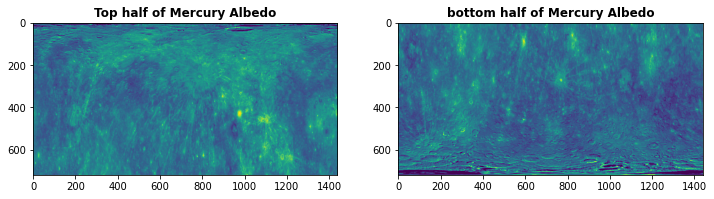

In [4]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(bottom)
plt.title('bottom half of Mercury Albedo', fontweight="bold")

# **Filling the missing gaps in all elemental maps of the Mercury**

## <font color='red'>I got the best results by using **median() method** to fill up the coverage gaps. We could get even better results if we split the dataset and apply this method on each split.

### <font color='#585858'>**Filling coverage gaps of Al/Si map**

In [11]:
alsi = alsi.replace(0E+00, alsi.median())

Text(0.5, 1.0, 'Al/Si map with gaps')

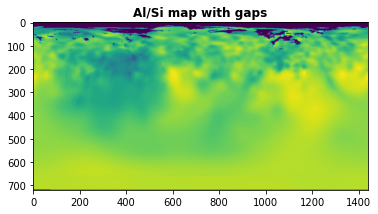

In [7]:
plt.imshow(alsi)
plt.title('Al/Si map with gaps', fontweight="bold")

Text(0.5, 1.0, 'Al/Si map with NO gaps')

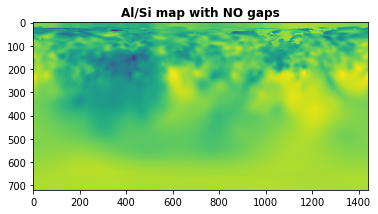

In [12]:
plt.imshow(alsi)
plt.title('Al/Si map with NO gaps', fontweight="bold")

### <font color='#585858'>**Filling coverage gaps of Ca/Si map**

In [13]:
casi = casi.replace(0E+00, casi.median())

Text(0.5, 1.0, 'Ca/Si map with gaps')

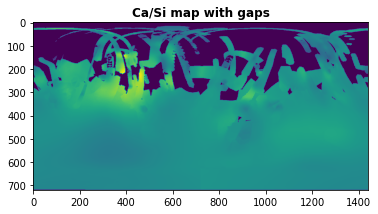

In [6]:
plt.imshow(casi)
plt.title('Ca/Si map with gaps', fontweight="bold")

Text(0.5, 1.0, 'Ca/Si map with NO gaps')

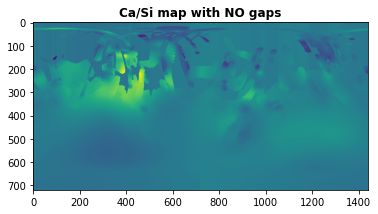

In [14]:
plt.imshow(casi)
plt.title('Ca/Si map with NO gaps', fontweight="bold")

### <font color='#585858'>**Filling coverage gaps of Fe/Si map**

In [31]:
fesi = fesi.replace(0E+00, fesi.median())

Text(0.5, 1.0, 'Fe/Si map with gaps')

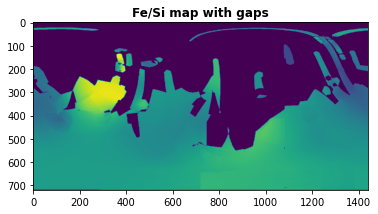

In [8]:
plt.imshow(fesi)
plt.title('Fe/Si map with gaps', fontweight="bold")

## Here, the percentage of coverage gaps is highest. Hence, we could get even better results if we split the dataset and apply this median() method on each split.

Text(0.5, 1.0, 'Fe/Si map with NO gaps')

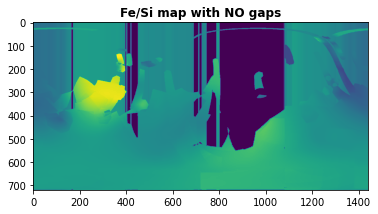

In [16]:
plt.imshow(fesi)
plt.title('Fe/Si map with NO gaps', fontweight="bold")

### <font color='#585858'>**Filling coverage gaps of Mg/Si map**

In [4]:
mgsi = mgsi.replace(0E+00, mgsi.median())

Text(0.5, 1.0, 'Mg/Si map with gaps')

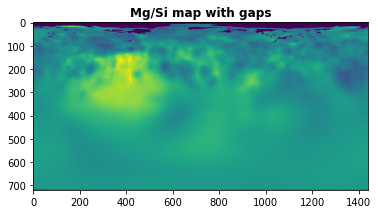

In [9]:
plt.imshow(mgsi)
plt.title('Mg/Si map with gaps', fontweight="bold")

Text(0.5, 1.0, 'Mg/Si map with NO gaps')

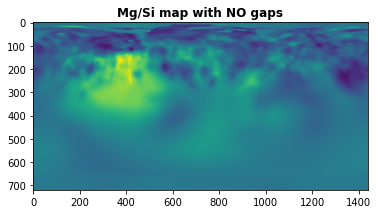

In [18]:
plt.imshow(mgsi)
plt.title('Mg/Si map with NO gaps', fontweight="bold")

### <font color='#585858'>**Filling coverage gaps of S/Si map**

In [11]:
ssi = ssi.replace(0E+00, ssi.median())

Text(0.5, 1.0, 'S/Si map with gaps')

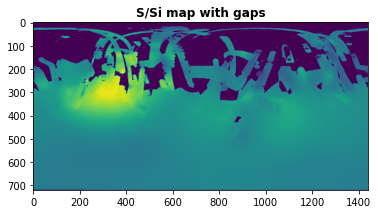

In [10]:
plt.imshow(ssi)
plt.title('S/Si map with gaps', fontweight="bold")

Text(0.5, 1.0, 'S/Si map with NO gaps')

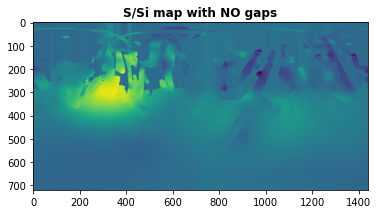

In [20]:
plt.imshow(ssi)
plt.title('S/Si map with NO gaps', fontweight="bold")

# **AL/Si element ratio**

### <font color='#585858'>**Spliting the image in two halves**

In [20]:
# top half for training
x = top
# bottom half for prediction
y = alsi

### <font color='#585858'>**Training Al/Si Data on Random Forest Regression**
### **Multi-Output Regression**

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators= 15, random_state=0))
regressor.fit(x, y)
# Predicting the results
y_pred = regressor.predict(bottom)

### <font color='#585858'>**Accuracy**

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(bottom,y_pred)

0.22345049280570323

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

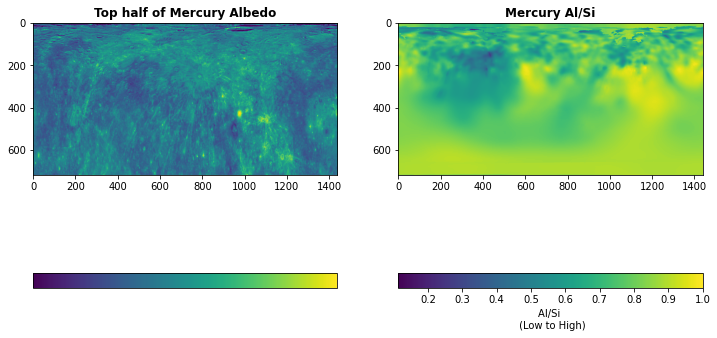

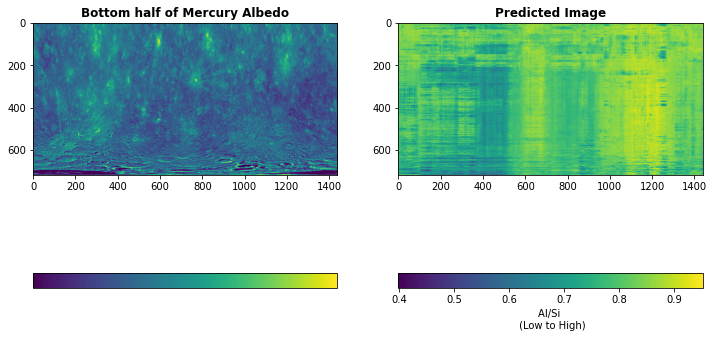

In [24]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi)
plt.title('Mercury Al/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### **Observation:** **<font color='#00008B'>Count of the high brightness pixels of <font color='#FFA60F'>range 0.9-1.0 is high</font> (these pixels shows where we could find the most amount of "Al/Si" on the Mercury)**

# **Ca/Si element ratio**

### <font color='#585858'>**Spliting the image in two halves**

In [21]:
# top half for training
x = top
# bottom half for prediction
y = casi

### <font color='#585858'>**Training Ca/Si Data on Random Forest Regression**
### **Multi-Output Regression**

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators= 15, random_state=0))
regressor.fit(x, y)
# Predicting the results
y_pred = regressor.predict(bottom)

### <font color='#585858'>**Accuracy**

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(bottom,y_pred)

0.04076710260836421

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

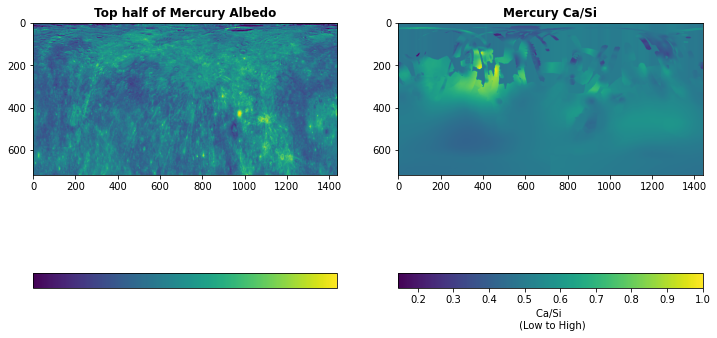

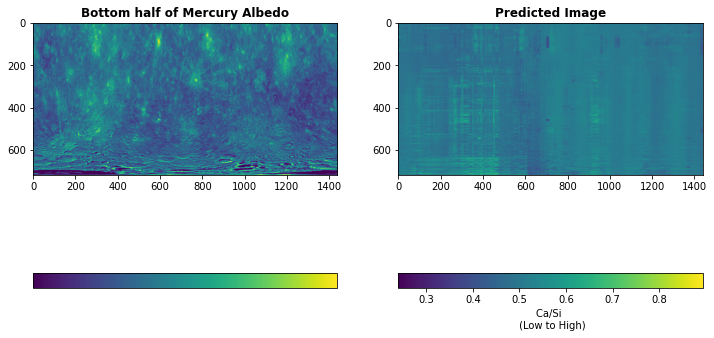

In [25]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(casi)
plt.title('Mercury Ca/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Ca/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Ca/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### **Observation:** **<font color='#00008B'>Count of the high brightness pixels of <font color='#FFA60F'>range 0.9-1.0 is less</font> (these pixels shows where we could find the most amount of "Ca/Si" on the Mercury)**

# **Fe/Si element ratio**

### <font color='#585858'>**Spliting the image in two halves**

In [34]:
# top half for training
x = top
# bottom half for prediction
y = fesi

### <font color='#585858'>**Training Fe/Si Data on Random Forest Regression**
### **Multi-Output Regression**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators= 15, random_state=0))
regressor.fit(x, y)
# Predicting the results
y_pred = regressor.predict(bottom)

### <font color='#585858'>**Accuracy**

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(bottom,y_pred)

0.04948179978825417

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

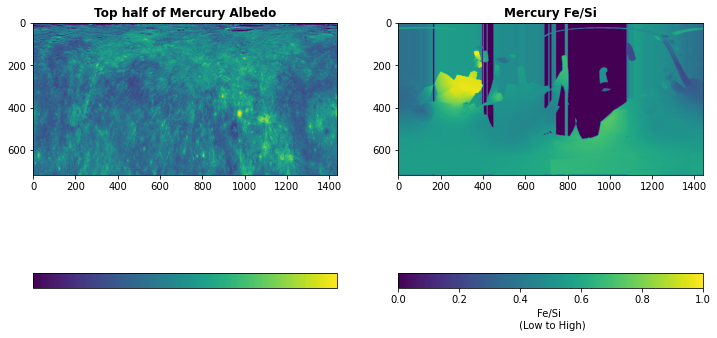

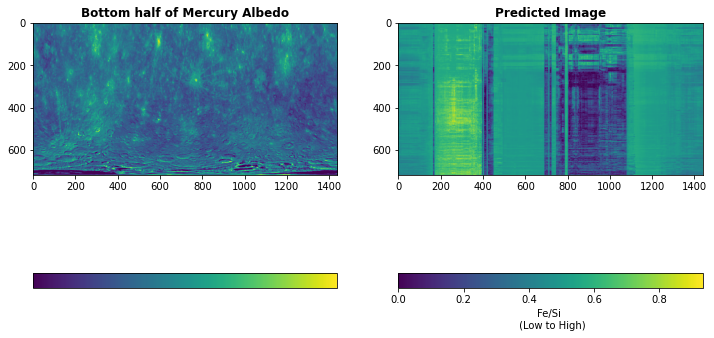

In [38]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(fesi)
plt.title('Mercury Fe/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Fe/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Fe/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

###**Observation:** **<font color='#00008B'>Count of the high brightness pixels of <font color='#FFA60F'>range 0.9-1.0 is less due to gaps</font> (these pixels shows where we could find the most amount of "Fe/Si" on the Mercury)**

# **Mg/Si element ratio**

### <font color='#585858'>**Spliting the image in two halves**

In [6]:
# top half for training
x = top
# bottom half for prediction
y = mgsi

### <font color='#585858'>**Training Mg/Si Data on Random Forest Regression**
### **Multi-Output Regression**

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators= 15, random_state=0))
regressor.fit(x, y)
# Predicting the results
y_pred = regressor.predict(bottom)

### <font color='#585858'>**Accuracy**

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(bottom,y_pred)

0.052537235149935

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

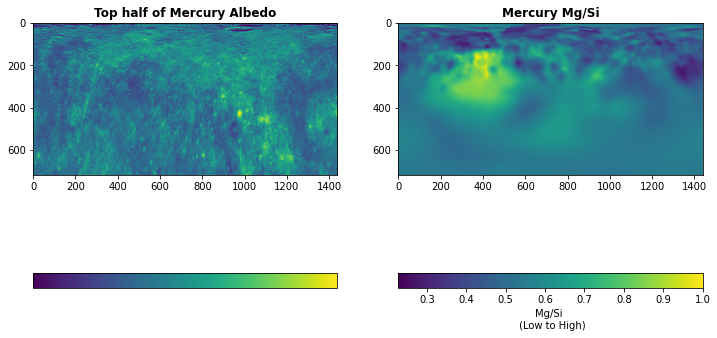

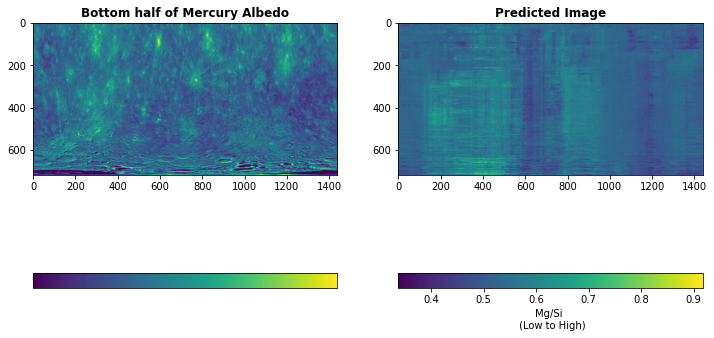

In [10]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(mgsi)
plt.title('Mercury Mg/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Mg/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Mg/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### **Observation:** **<font color='#00008B'>Count of the high brightness pixels of <font color='#FFA60F'>range 0.9-1.0 is less</font> (these pixels shows where we could find the most amount of "Mg/Si" on the Mercury)**

# **S/Si element ratio**

### <font color='#585858'>**Spliting the image in two halves**

In [12]:
# top half for training
x = top
# bottom half for prediction
y = ssi

### <font color='#585858'>**Training S/Si Data on Random Forest Regression**
### **Multi-Output Regression**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators= 15, random_state=0))
regressor.fit(x, y)
# Predicting the results
y_pred = regressor.predict(bottom)

### <font color='#585858'>**Accuracy**

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(bottom,y_pred)

0.034891167541850364

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

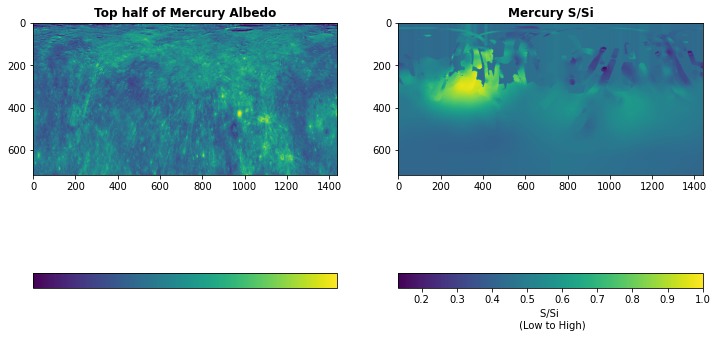

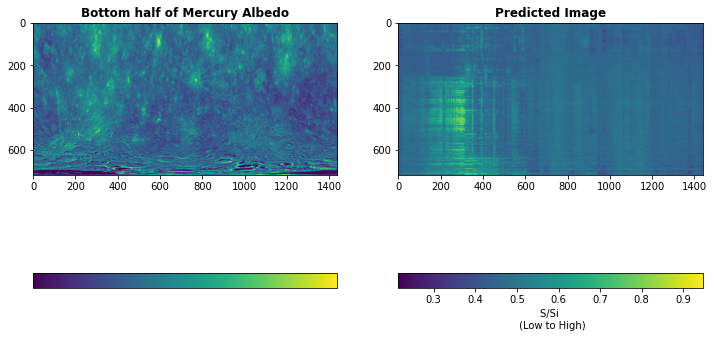

In [16]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(ssi)
plt.title('Mercury S/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'S/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'S/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

###**Observation:** **<font color='#00008B'>Count of the high brightness pixels of <font color='#FFA60F'>range 0.9-1.0 is less</font> (these pixels shows where we could find the most amount of "S/Si" on the Mercury)**